In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb

# Load the dataset
data = pd.read_csv(r"E:\4th sem\IOBS-2\project\Non Coding RNA classification\rna_sequence_features.csv")

# Separate features (X) and target variable (y)
X = data.drop(columns=['RNA_Name'])
y = data['RNA_Name']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize or scale the features if necessary (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Train SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Train XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_scaled, y_train)

# Train LightGBM classifier
lgbm_classifier = lgb.LGBMClassifier(random_state=42)
lgbm_classifier.fit(X_train_scaled, y_train)

# Evaluate classifiers
rf_accuracy = rf_classifier.score(X_test_scaled, y_test)
svm_accuracy = svm_classifier.score(X_test_scaled, y_test)
xgb_accuracy = xgb_classifier.score(X_test_scaled, y_test)
lgbm_accuracy = lgbm_classifier.score(X_test_scaled, y_test)

# Display the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)
print("LightGBM Accuracy:", lgbm_accuracy)


ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Dataset preview:
   AAA  AAC  AAG  AAU  ACA  ACC  ACG  ACU  AGA  AGC  ...  GU   CC    CG  \
0    4    2    2    5    0    1    2    1    2    4  ...   9  8.0  13.0   
1    4    3    3    6    0    0    3    3    3    4  ...   5  NaN  10.0   
2    2    6    3    1    2    0    3    3    1    4  ...   6  5.0  11.0   
3    1    5    2    5    1    3    3    2    3    1  ...   7  6.0   6.0   
4   13    2    6    8    0    1    2    0    6    2  ...   6  4.0   5.0   

   Molecular_Weight  Sequence_Length         A         C         U         G  \
0        49281.0689              153  0.274510  0.209150  0.267974  0.248366   
1        51391.3912              159  0.295597  0.188679  0.251572  0.264151   
2        48445.6692              150  0.260000  0.240000  0.220000  0.280000   
3        47240.9023              147  0.306122  0.210884  0.272109  0.210884   
4        49813.6502              154  0.389610  0.162338  0.233766  0.214286   

                                    RNA_Name  
0   

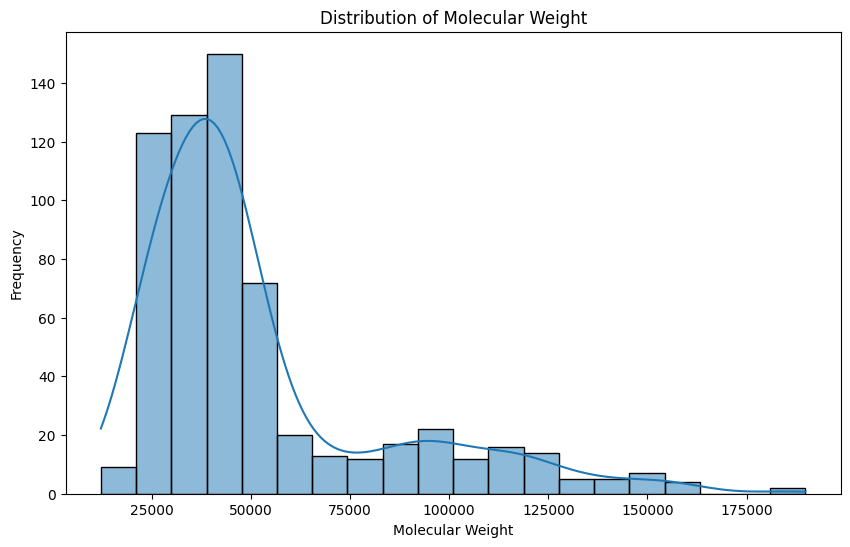

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"E:\4th sem\IOBS-2\project\Non Coding RNA classification\rna_sequence_features.csv")

# Display the first few rows of the dataset
print("Dataset preview:")
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values:")
print(missing_values)

# Describe the dataset
print("\nDataset statistics:")
print(data.describe())

# Visualize the distribution of features
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Molecular_Weight', bins=20, kde=True)
plt.title('Distribution of Molecular Weight')
plt.xlabel('Molecular Weight')
plt.ylabel('Frequency')
plt.show()
